In [2]:
!pip install nibabel

     |████████████████████████████████| 3.3 MB 347 kB/s eta 0:00:01


In [3]:
!pip install tqdm

     |████████████████████████████████| 78 kB 333 kB/s eta 0:00:01


In [4]:
from pathlib import Path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

# LOADING DATA:
here I load the Medical Decathlon data from the link provided by the Udemy course:

(Data License: CC-BY-SA 4.0, https://creativecommons.org/licenses/by-sa/4.0/)

In [5]:
#this link is usually busy so I used the AWS link
# !gdown 1I1LR7XjyEZ-VBQ-Xruh31V7xExMjlVvi

In [6]:
!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task06_Lung.tar

--2024-06-18 07:43:47--  https://msd-for-monai.s3-us-west-2.amazonaws.com/Task06_Lung.tar
Resolving msd-for-monai.s3-us-west-2.amazonaws.com (msd-for-monai.s3-us-west-2.amazonaws.com)... 52.92.177.82, 52.92.207.186, 52.92.239.42, ...
Connecting to msd-for-monai.s3-us-west-2.amazonaws.com (msd-for-monai.s3-us-west-2.amazonaws.com)|52.92.177.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9163696640 (8.5G) [application/x-tar]
Saving to: ‘Task06_Lung.tar.1’

Task06_Lung.tar.1     0%[                    ]  77.81M  22.5MB/s    eta 9m 49s ^C


In [9]:
!mkdir lung_capstone  #this name shouldn't contain the phrase 'data' because it will interfere with a function that is defined in the Dataset section!

In [10]:
!tar -xvf  'Task06_Lung.tar' -C 'lung_capstone/'

Task06_Lung/._dataset.json
Task06_Lung/dataset.json
Task06_Lung/._imagesTr
Task06_Lung/imagesTr/
Task06_Lung/imagesTr/._lung_053.nii.gz
Task06_Lung/imagesTr/lung_053.nii.gz
Task06_Lung/imagesTr/._lung_022.nii.gz
Task06_Lung/imagesTr/lung_022.nii.gz
Task06_Lung/imagesTr/._lung_041.nii.gz
Task06_Lung/imagesTr/lung_041.nii.gz
Task06_Lung/imagesTr/._lung_069.nii.gz
Task06_Lung/imagesTr/lung_069.nii.gz
Task06_Lung/imagesTr/._lung_014.nii.gz
Task06_Lung/imagesTr/lung_014.nii.gz
Task06_Lung/imagesTr/._lung_006.nii.gz
Task06_Lung/imagesTr/lung_006.nii.gz
Task06_Lung/imagesTr/._lung_065.nii.gz
Task06_Lung/imagesTr/lung_065.nii.gz
Task06_Lung/imagesTr/._lung_018.nii.gz
Task06_Lung/imagesTr/lung_018.nii.gz
Task06_Lung/imagesTr/._lung_096.nii.gz
Task06_Lung/imagesTr/lung_096.nii.gz
Task06_Lung/imagesTr/._lung_084.nii.gz
Task06_Lung/imagesTr/lung_084.nii.gz
Task06_Lung/imagesTr/._lung_086.nii.gz
Task06_Lung/imagesTr/lung_086.nii.gz
Task06_Lung/imagesTr/._lung_043.nii.gz
Task06_Lung/imagesTr/lung_04

here I define my root paths to train data, train labels, and test data

In [7]:
train_data_path = Path("lung_capstone/Task06_Lung/imagesTr/")
label_data_path = Path("lung_capstone/Task06_Lung/labelsTr/")
test_data_path = Path("lung_capstone/Task06_Lung/imagesTs/")

this helper function gets a path to an image and gives the label path for that image

In [8]:
def change_img_to_label_path(path):
    parts = list(path.parts)  # get all directories within the path
    parts[parts.index("imagesTr")] = "labelsTr"  # Replace imagesTr with labelsTr
    return Path(*parts)  # Combine list back into a Path object

# Load a file as an example

In [9]:
#loading the first file as an example:
sample_path = list(train_data_path.glob("lung*"))[0]  # all of our file names begin with "lung"
sample_path_label = change_img_to_label_path(sample_path)

data = nib.load(sample_path)
label = nib.load(sample_path_label)

ct = data.get_fdata()
mask = label.get_fdata().astype(np.uint8)  # Class labels should not be handled as float64

nib.aff2axcodes(data.affine) #here we see the affines:

('L', 'A', 'S')

In [10]:
ct.shape

(512, 512, 304)

In [11]:
label.shape

(512, 512, 304)

Now I will install celluloid to get a visualisation:

In [12]:
!pip install celluloid

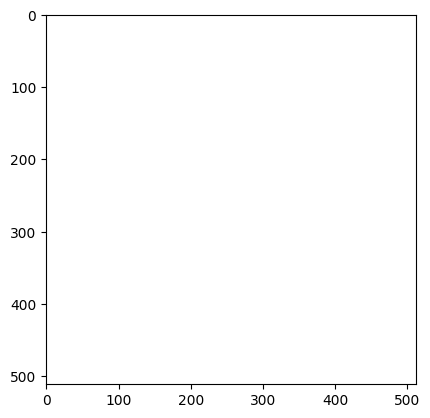

In [ ]:
from celluloid import Camera
from IPython.display import HTML

fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(ct.shape[2]):  # Sagital view
    plt.imshow(ct[:,:,i], cmap="bone")
    mask_ = np.ma.masked_where(mask[:,:,i]==0, mask[:,:,i])
    plt.imshow(mask_, alpha=0.5, cmap="autumn")
    # plt.axis("off")
    camera.snap()  # Store the current slice
animation = camera.animate()  # Create the animation

HTML(animation.to_html5_video())  # convert the animation to a video

# Preprocessing

In [13]:
all_files = list(train_data_path.glob("lung*"))  # Get all subjects
len(all_files) #should be 63

63

In [14]:
#we need this to resize our scans in the next block:
from scipy.ndimage import zoom

# Define the zooms: (from 512 to 256 px)
zoom_factors = [0.5, 0.5]

In [15]:
# !rm -r lung_capstone/Preprocessed/

In [16]:
pip install jupyter

     |████████████████████████████████| 5.0 MB 394 kB/s eta 0:00:01
     |████████████████████████████████| 139 kB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 20.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 21.1 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 618 kB/s eta 0:00:011
     |████████████████████████████████| 2.3 MB 20.4 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 20.1 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 770 kB/s eta 0:00:011
     |████████████████████████████████| 75 kB 769 kB/s eta 0:00:011
     |████████████████████████████████| 77 kB 802 kB/s eta 0:00:011
     |████████████████████████████████| 58 kB 7.1 MB/s  eta 0:00:01
  Attempting uninstall: jupyterlab-server
    Found existing installation: jupyterlab-server 2.23.0
    Uninstalling jupyterlab-server-2.23.0:
      Successfully uninstalled jupyterlab-server-2.23.0
  Attempting uninstall: jupyterlab
    Found ex

In [22]:
from tqdm import tqdm
save_root = Path("lung_capstone/Preprocessed")

for counter, path_to_ct_data in enumerate(tqdm(all_files)):

    path_to_label = change_img_to_label_path(path_to_ct_data)

    ct = nib.load(path_to_ct_data)
    assert nib.aff2axcodes(ct.affine) == ("L", "A", "S")    # make sure affine of all files is LAS
    ct_data = ct.get_fdata()
    label_data = nib.load(path_to_label).get_fdata().astype(np.uint8)

    # Cropping volume and label mask - this reduces 30 px from top and 30 px from bottom:
    ct_data = ct_data[:,:,:-30]
    label_data = label_data[:,:,:-30]

    #lung window
    lung_window_ct= np.clip(ct_data,-1000,-500)

    # standardize the images to [0, 1] (because the data is CT, no normalization is done)
    standardized_ct_data = (lung_window_ct + 1000) / 500


    if counter < 58:  # the first 57 subjects are for tarin - and the last 6 are val
        current_path = save_root/"train"/str(counter)
    else:
        current_path = save_root/"val"/str(counter)


    #directory creation:
    slice_path = current_path/"data"
    mask_path = current_path/"masks"
    slice_path.mkdir(parents=True, exist_ok=True)
    mask_path.mkdir(parents=True, exist_ok=True)

    # all slices that contain tumor will be saved into this variable:
    tumorous_slices = []
    tumorous_slices_labels=[]

    # Loop over the slices in the full volume and store the images and labels in the data/masks directory
    file_name_counter=0
    for i in range(standardized_ct_data.shape[-1]):
        #extracting slices and scaling them:
        slice = zoom(standardized_ct_data[:,:,i], zoom_factors, order=0)
        mask = zoom(label_data[:,:,i], zoom_factors, order=0)

        if mask.sum()>0: #which means that this slice contains tumor
          tumorous_slices.append(slice)
          tumorous_slices_labels.append(mask)

        np.save(slice_path/str(file_name_counter), slice)
        np.save(mask_path/str(file_name_counter), mask)
        file_name_counter+=1

    #Oversampling the slices of this sample that contain Tumor:
    if tumorous_slices:
      fraction = round((standardized_ct_data.shape[-1]-len(tumorous_slices))/len(tumorous_slices))
      for i in range(fraction):
        for j in range(len(tumorous_slices)):
          np.save(slice_path/str(file_name_counter), tumorous_slices[j])
          np.save(mask_path/str(file_name_counter), tumorous_slices_labels[j])
          file_name_counter+=1

      standardized_ct_data.shape[-1]
      len(tumorous_slices)
      len(tumorous_slices_labels)



  0%|          | 0/63 [00:00<?, ?it/s]

  2%|▏         | 1/63 [00:14<15:03, 14.58s/it]

  3%|▎         | 2/63 [00:27<14:05, 13.86s/it]

  5%|▍         | 3/63 [00:40<13:21, 13.35s/it]

  6%|▋         | 4/63 [00:56<13:57, 14.20s/it]

  8%|▊         | 5/63 [01:24<18:44, 19.39s/it]

 10%|▉         | 6/63 [01:39<16:45, 17.64s/it]

 11%|█         | 7/63 [01:49<14:24, 15.43s/it]

 13%|█▎        | 8/63 [02:19<18:10, 19.82s/it]

 14%|█▍        | 9/63 [02:32<16:04, 17.86s/it]

 16%|█▌        | 10/63 [02:42<13:37, 15.43s/it]

 17%|█▋        | 11/63 [02:55<12:44, 14.69s/it]

 19%|█▉        | 12/63 [03:10<12:37, 14.85s/it]

 21%|██        | 13/63 [03:35<14:45, 17.71s/it]

 22%|██▏       | 14/63 [04:01<16:38, 20.37s/it]

 24%|██▍       | 15/63 [04:20<15:50, 19.81s/it]

 25%|██▌       | 16/63 [04:29<13:06, 16.74s/it]

 27%|██▋       | 17/63 [04:41<11:39, 15.21s/it]

 29%|██▊       | 18/63 [04:51<10:19, 13.76s/it]

 30%|███       | 19/63 [05:03<09:39, 13.17s/it]

 32%|███▏      | 20/63 [05:17<09:32,

In [133]:
standardized_ct_data.shape[-1]

NameError: name 'standardized_ct_data' is not defined

In [24]:
len(tumorous_slices)

12

In [25]:
len(tumorous_slices_labels)

12

In [26]:
fraction

17

In [27]:
file_name_counter

425

checking preprocessed data:

In [17]:
path = Path("lung_capstone/Preprocessed/train/1/")  # Select a subject
file = "400.npy" # Choose a file
aslice = np.load(path/"data"/file) # load slice and mask
mask = np.load(path/"masks"/file)
print(aslice.min(), aslice.max())

0.0 1.0


In [18]:
aslice.shape

(256, 256)

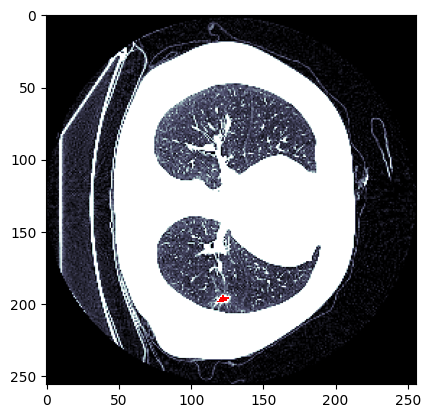

In [19]:
# Plot this example
plt.figure()
plt.imshow(aslice, cmap="bone")
mask_ = np.ma.masked_where(mask==0, mask)
plt.imshow(mask_, cmap="autumn")

# Dataset Class

imageaug handles augmenting the slices and labels in the same way:

In [20]:
pip install imgaug

     |████████████████████████████████| 948 kB 355 kB/s eta 0:00:01
     |████████████████████████████████| 2.5 MB 15.8 MB/s eta 0:00:01
     |████████████████████████████████| 313 kB 27.2 MB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 21.5 MB/s eta 0:00:01
     |████████████████████████████████| 62.5 MB 35.1 MB/s eta 0:00:01
     |████████████████████████████████| 220 kB 29.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 19.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
import torch
import imgaug
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

In [22]:
class LungTumorDataset(torch.utils.data.Dataset):
    def __init__(self, root, augment_params):
        self.all_files = self.extract_files(root)
        self.augment_params = augment_params

    @staticmethod #we use static method because it doesn't use "self" variable of the class
    def extract_files(root):
        """
        Extract the paths to all slices given the root path (ends with train or val)
        """
        files = []
        for subject in root.glob("*"):   # Iterate over the subjects
            slice_path = subject/"data"  # Get the slices for current subject (we don't get masks)
            for slice in slice_path.glob("*.npy"):
                files.append(slice)
        return files


    @staticmethod #pretty much the same as the function we defined in preprocessing step
    def change_img_to_label_path(path):
        """
        Replace data with mask to get the masks
        """
        parts = list(path.parts)
        parts[parts.index("data")] = "masks"
        return Path(*parts)


    def augment(self, slice, mask):
        """
        Augments slice and segmentation mask in the exact same way
        Note the manual seed initialization
        """
        ###################IMPORTANT###################
        # Fix for https://discuss.pytorch.org/t/dataloader-workers-generate-the-same-random-augmentations/28830/2
        random_seed = torch.randint(0, 1000000, (1,)).item()
        imgaug.seed(random_seed)  #to get random transformation while augmenting!
        #####################################################
        mask = SegmentationMapsOnImage(mask, mask.shape)
        slice_aug, mask_aug = self.augment_params(image=slice, segmentation_maps=mask)
        mask_aug = mask_aug.get_arr()
        return slice_aug, mask_aug



    def __len__(self):
        """
        Return the length of the dataset (length of all files)
        """
        return len(self.all_files)



    def __getitem__(self, idx):
        """
        Given an index return the (augmented) slice and corresponding mask
        Add another dimension for pytorch
        """
        file_path = self.all_files[idx]
        mask_path = self.change_img_to_label_path(file_path)
        # slice = np.load(file_path).astype(np.float32)  # Convert to float for torch
        slice = np.load(file_path).astype(np.float32) 
        mask = np.load(mask_path)

        if self.augment_params:
            slice, mask = self.augment(slice, mask)

        # Note that pytorch expects the input of shape BxCxHxW, where B corresponds to the batch size, C to the channels, H to the height and W to Width.
        # As our data is of shape (HxW) we need to manually add the C axis by using expand_dims.
        # The batch dimension is later added by the dataloader
        # using expand_dims helps us get rid of using unsqeeze everytime

        return np.expand_dims(slice, 0), np.expand_dims(mask, 0)


In [23]:
import imgaug.augmenters as iaa

In [24]:
seq = iaa.Sequential([
    iaa.Affine(translate_percent=(0.15), scale=(0.85, 1.15), # Zoom in or out
               rotate=(-45, 45)),  # Rotate up to 45 degrees
    iaa.ElasticTransformation()  # Random Elastic Deformations
                ])

In [25]:
# Create the dataset object
path = Path("lung_capstone/Preprocessed/train/")
dataset = LungTumorDataset(path, seq)

As we have used a random seed, every time we retreive one single image from the dataset, it should have different transformations. Here we will retrieve one slice 9 times.
### NOTE: despite different transformations, the mask and image should always align in the same way

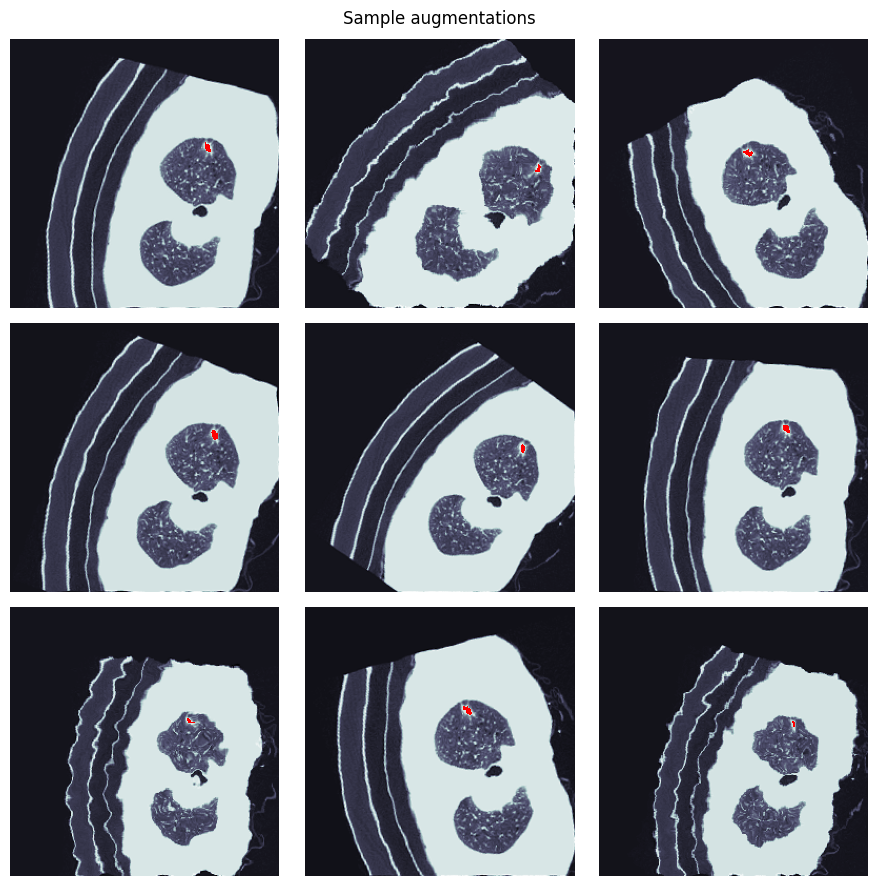

In [26]:
fig, axis = plt.subplots(3, 3, figsize=(9, 9))

for i in range(3):
    for j in range(3):
        slice, mask = dataset[200] #slice number 10 has both image and mask
        mask_ = np.ma.masked_where(mask==0, mask)
        axis[i][j].imshow(slice[0], cmap="bone")
        axis[i][j].imshow(mask_[0], cmap="autumn")
        axis[i][j].axis("off")

fig.suptitle("Sample augmentations")
plt.tight_layout()


# UNet Train Model:
for segmentation
<br><br>
we first create a helper class, because unet has a lot of double convolutions:


In [27]:
class DoubleConv(torch.nn.Module):
    def __init__(self, in_channels, out_channels):

        super().__init__()
        self.step = torch.nn.Sequential(torch.nn.Conv2d(in_channels, out_channels, 3, padding=1),
                                        torch.nn.ReLU(),
                                        torch.nn.Conv2d(out_channels, out_channels, 3, padding=1),
                                        torch.nn.ReLU())

    def forward(self, X):
        return self.step(X)


In [28]:
class UNet(torch.nn.Module):
    def __init__(self):
        super().__init__()

        #layers of the encoder:
        self.layer1 = DoubleConv(1, 64)
        self.layer2 = DoubleConv(64, 128)
        self.layer3 = DoubleConv(128, 256)
        self.layer4 = DoubleConv(256, 512)

        #layers of the decoder:
        self.layer5 = DoubleConv(512+256, 256)
        self.layer6 = DoubleConv(256+128, 128)
        self.layer7 = DoubleConv(128+64, 64)
        self.layer8 = torch.nn.Conv2d(64, 1, 1)

        #we define maxpool for ease of use:
        self.maxpool = torch.nn.MaxPool2d(2)

    def forward(self, x):
        #encoder:
        x1 = self.layer1(x)
        x1m = self.maxpool(x1)

        x2 = self.layer2(x1m)
        x2m = self.maxpool(x2)

        x3 = self.layer3(x2m)
        x3m = self.maxpool(x3)

        x4 = self.layer4(x3m)

        #decoder:
        #we upsample x4 layer, and also receive the output of x3 layer (skip connections)
        x5 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x4)
        x5 = torch.cat([x5, x3], dim=1)
        x5 = self.layer5(x5)

        x6 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x5)
        x6 = torch.cat([x6, x2], dim=1)
        x6 = self.layer6(x6)

        x7 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x6)
        x7 = torch.cat([x7, x1], dim=1)
        x7 = self.layer7(x7)

        ret = self.layer8(x7)
        return ret

In [29]:
model = UNet()

if this runs with no problem, it means that our model works:

In [30]:
random_input = torch.randn(1, 1, 256, 256)
output = model(random_input)
assert output.shape == torch.Size([1, 1, 256, 256])

# TRAIN:

In [34]:
!pip install pytorch_lightning

In [35]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger

In [36]:
seq = iaa.Sequential([
    iaa.Affine(translate_percent=(0.15),
               scale=(0.85, 1.15),
              rotate=(-45, 45)),
    iaa.ElasticTransformation()
])

In [37]:
# Create the dataset objects
train_path = Path("lung_capstone/Preprocessed/train/")
val_path = Path("lung_capstone/Preprocessed/val")

train_dataset = LungTumorDataset(train_path, seq)
val_dataset = LungTumorDataset(val_path, None)

print(f"There are {len(train_dataset)} train images and {len(val_dataset)} val images")

There are 27729 train images and 2050 val images


In [38]:
batch_size = 8
num_workers = 4

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=False)


In [39]:
class LungTumorSegmentation(pl.LightningModule):
    def __init__(self):
        super().__init__()

        self.model = UNet()

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-4)
        self.loss_fn = torch.nn.BCEWithLogitsLoss()

    def forward(self, data):
        return self.model(data)

    def training_step(self, batch, batch_idx):
        ct, mask = batch
        mask = mask.float()
        pred = self(ct)

        loss = self.loss_fn(pred, mask)

        self.log("Train Loss", loss)

        if batch_idx % 50 == 0:  #log every 50 batches
            self.log_images(ct.cpu(), pred.cpu(), mask.cpu(), "Train")

        return loss

    def validation_step(self, batch, batch_idx):
        ct, mask = batch
        mask = mask.float()
        pred = self(ct)

        loss = self.loss_fn(pred, mask)

        self.log("Val Loss", loss)

        #log every fifty batches:
        if batch_idx % 50 == 0:
            self.log_images(ct.cpu(), pred.cpu(), mask.cpu(), "Val")

        return loss

    def log_images(self, ct, pred, mask, name):

        pred = pred > 0.5

        fig, axis = plt.subplots(1, 2)
        axis[0].imshow(ct[0][0], cmap="bone")
        mask_ = np.ma.masked_where(mask[0][0] == 0, mask[0][0])
        axis[0].imshow(mask_, alpha=0.6)
        axis[0].set_title("Ground Truth")

        axis[1].imshow(ct[0][0], cmap="bone")
        mask_ = np.ma.masked_where(pred[0][0] == 0, pred[0][0])
        axis[1].imshow(mask_, alpha=0.6,cmap="autumn")
        axis[1].set_title("Prediction")

        self.logger.experiment.add_figure(name, fig, self.global_step)

    def configure_optimizers(self):
        return [self.optimizer]

In [40]:
# Instanciate the model and set the random seed
torch.manual_seed(0)
model = LungTumorSegmentation()

In [41]:
# Create the checkpoint callback
checkpoint_callback = ModelCheckpoint(
    monitor='Val Loss',
    # save_top_k=10,
    mode='min',
    # trying to save every step as checkpoint:
    dirpath='checkpoints/', # Directory to save checkpoints  
    filename='model-{epoch:02d}-{val_loss:.2f}', # Checkpoint file name format
    save_top_k=30,  )

In [42]:
# Create the trainer
# Change the gpus parameter to the number of available gpus in system
# Use 0 for CPU training
# (BUT INSTEAD OF gpus=gpus we used: accelerator!!!!)
trainer = pl.Trainer(
    accelerator="auto", 
                     logger=TensorBoardLogger(save_dir="./logs"), log_every_n_steps=1,
                     callbacks=checkpoint_callback,max_epochs=30)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model, train_loader, val_loader)

# Model Evaluation:

In [95]:
class DiceScore(torch.nn.Module):
    """
    class to compute the Dice Loss
    """
    def __init__(self):
        super().__init__()

    def forward(self, pred, mask):
                
        #flatten label and prediction tensors
        pred = torch.flatten(pred)
        mask = torch.flatten(mask)
        
        counter = (pred * mask).sum()  # Counter       
        denum = pred.sum() + mask.sum()  # denominator
        dice = (2*counter)/denum
        
        return dice

In [44]:
model.eval();
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device);

In [346]:
preds = []
labels = []

for slice, label in val_dataset:
    slice = torch.tensor(slice).float().to(device).unsqueeze(0)
    with torch.no_grad():
        pred = torch.sigmoid(model(slice))
    preds.append(pred.cpu().numpy())
    labels.append(label)
    
preds = np.array(preds)
labels = np.array(labels)

In [347]:
preds.shape

(2050, 1, 1, 256, 256)

In [348]:
labels.shape

(2050, 1, 256, 256)

In [96]:
dice_score = DiceScore()(torch.from_numpy(preds), torch.from_numpy(labels).unsqueeze(0).float())
print(f"The Val Dice Score is: {dice_score}")

The Val Dice Score is: 0.36665797233581543


In [55]:
# Convert NumPy arrays to PyTorch tensors
tPreds = torch.from_numpy(preds)
tLabels = torch.from_numpy(labels)

tPreds = tPreds.squeeze(1)  

tPreds = tPreds.float()
tLabels = tLabels.float()


1-model.loss_fn(tPreds, tLabels)  #

tensor(0.3069)

In [100]:
class IOU(torch.nn.Module):
    
    def __init__(self):
        super().__init__()

    def forward(self, pred, mask):
        epsilon=1e-6     
        #flatten label and prediction tensors
        pred = torch.flatten(pred)
        mask = torch.flatten(mask)
        
        intersection = (pred * mask).sum()
        union = pred.sum() + mask.sum() - intersection
        return (intersection + epsilon) / (union + epsilon)

In [105]:
iou_index = IOU()(torch.from_numpy(preds), torch.from_numpy(labels).unsqueeze(0).float())
print(f"The IoU (Jaccard Index)  is: {iou_index}")

The IoU (Jaccard Index)  is: 0.22448328137397766


In [116]:
from sklearn.metrics import precision_score, recall_score, f1_score

def precision(pred, target):
    threshold = 0.5
    binary_preds = (preds >= threshold).astype(int)
    return precision_score(target.flatten(), binary_preds.flatten())

def recall(pred, target):
    threshold = 0.5
    binary_preds = (preds >= threshold).astype(int)
    return recall_score(target.flatten(), binary_preds.flatten())

def f1(pred, target):
    threshold = 0.5
    binary_preds = (preds >= threshold).astype(int)
    return f1_score(target.flatten(), binary_preds.flatten())

In [112]:
precision_index = precision(torch.from_numpy(preds), torch.from_numpy(labels).unsqueeze(0).float())
print(f"The precision  is: {precision_index}")

The precision  is: 0.816866863719263


In [117]:
recall_index = recall(torch.from_numpy(preds), torch.from_numpy(labels).unsqueeze(0).float())
print(f"The recall  is: {recall_index}")

The recall  is: 0.23519718972947526


In [118]:
f1_index = f1(torch.from_numpy(preds), torch.from_numpy(labels).unsqueeze(0).float())
print(f"The f1 score  is: {f1_index}")

The f1 score  is: 0.3652340180240978


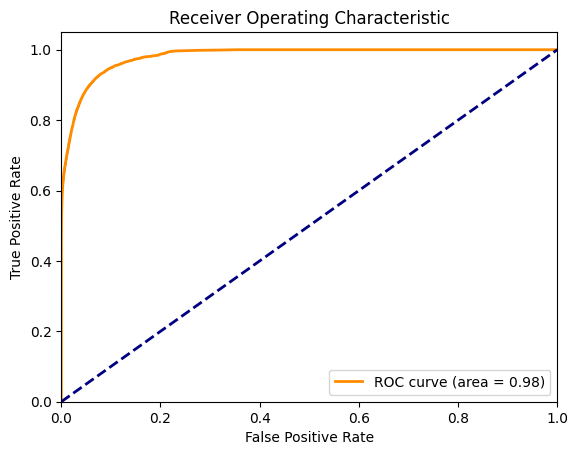

In [349]:
from sklearn.metrics import roc_curve, auc

pred_masks = torch.from_numpy(preds)
true_masks=torch.from_numpy(labels).unsqueeze(0).float()

fpr, tpr, _ = roc_curve(true_masks.flatten(), pred_masks.flatten())
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [359]:
from sklearn.metrics import roc_curve, auc
# the range of threshold values to iterate over
threshold_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

predicted_probabilities = torch.from_numpy(preds)
true_masks = torch.from_numpy(labels).unsqueeze(0).float()

# Initialize lists to store metrics
sensitivity_list = []
specificity_list = []
auc_list = []

# Iterate over each threshold value
for threshold in threshold_values:
    binary_predictions = (predicted_probabilities >= threshold).numpy().astype(int)  # Convert to numpy and apply threshold
    # Calculate True Positive Rate (TPR) and False Positive Rate (FPR) using roc_curve
    fpr, tpr, _ = roc_curve(true_masks.flatten(), binary_predictions.flatten())
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = tpr[1]  # TPR when the positive class is considered as '1'
    # Calculate Specificity (1 - False Positive Rate)
    specificity = 1 - fpr[1]  # 1 - FPR when the positive class is considered as '1'
    # Calculate Area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)
    # Append metrics to lists
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    auc_list.append(roc_auc)

In [360]:
sensitivity_list

[0.3906221707166914,
 0.3319179372034911,
 0.2921812189910549,
 0.26049324593488576,
 0.23519718972947526,
 0.21144026364393584,
 0.18711295404338535,
 0.156864520334625,
 0.11221163944518886]

In [361]:
specificity_list

[0.9998460201551348,
 0.9999005798253715,
 0.9999281725368074,
 0.9999439951391536,
 0.9999566144839626,
 0.9999657400432252,
 0.9999747389620737,
 0.9999835218472742,
 0.9999923419796555]

In [362]:
auc_list

[0.6952340954359132,
 0.6659092585144313,
 0.6460546957639312,
 0.6302186205370196,
 0.6175769021067189,
 0.6057030018435805,
 0.5935438465027295,
 0.5784240210909497,
 0.5561019907124222]

In [364]:
from sklearn.metrics import precision_score, recall_score, f1_score

def precision(pred, target):
    threshold = 0.1
    binary_preds = (preds >= threshold).astype(int)
    return precision_score(target.flatten(), binary_preds.flatten())

def recall(pred, target):
    threshold = 0.1
    binary_preds = (preds >= threshold).astype(int)
    return recall_score(target.flatten(), binary_preds.flatten())

def f1(pred, target):
    threshold = 0.1
    binary_preds = (preds >= threshold).astype(int)
    return f1_score(target.flatten(), binary_preds.flatten())

In [365]:
precision_index = precision(torch.from_numpy(preds), torch.from_numpy(labels).unsqueeze(0).float())
print(f"The precision  is: {precision_index}")

The precision  is: 0.6760949619995299


In [366]:
recall_index = recall(torch.from_numpy(preds), torch.from_numpy(labels).unsqueeze(0).float())
print(f"The recall  is: {recall_index}")

The recall  is: 0.3906221707166914


In [367]:
f1_index = f1(torch.from_numpy(preds), torch.from_numpy(labels).unsqueeze(0).float())
print(f"The f1 score  is: {f1_index}")

The f1 score  is: 0.495159726167318


# Test with a subject
we first test with a training subject:

In [233]:
tr_subj_path = Path("lung_capstone/Task06_Lung/imagesTr/lung_003.nii.gz")  # Select a subject
lb_subj_path= Path("lung_capstone/Task06_Lung/labelsTr/lung_003.nii.gz")  
subject_ct = nib.load(tr_subj_path).get_fdata()
subject_label= nib.load(lb_subj_path).get_fdata()
print(subject_ct.min(), subject_ct.max())

-1024.0 2389.0


In [260]:
#cropping 30 pixels from the bottom
subject_ct = subject_ct[:,:,:-30] 
subject_label = subject_label[:,:,:-30]
#lung window
lung_window_subject_ct= np.clip(subject_ct,-1000,-500)
# standardize
standardized_scan = (lung_window_subject_ct + 1000) / 500
# Define the zooms: (from 512 to 256 px)
zoom_factors = [0.5, 0.5,1]
#extracting slices and scaling them:
standardized_scan = zoom(standardized_scan, zoom_factors, order=0)
standardized_label = zoom(subject_label, zoom_factors, order=0)

In [261]:
standardized_scan.shape

(256, 256, 209)

In [262]:
standardized_label.shape

(256, 256, 228)

In [264]:
THRESHOLD = 0.5
assert len(standardized_scan.shape) == 3, "Expected standardized_scan to be a 3D array (H, W, D)"
assert len(standardized_label.shape) == 3, "Expected standardized_label to be a 3D array (H, W, D)"

segmentation = []
labels = []
scan = []

for i in range(standardized_scan.shape[-1]):
    slice = torch.tensor(standardized_scan[:,:,i])
    scan.append(slice)
    slice_tensor = slice.unsqueeze(0).unsqueeze(0).float()  # Shape: [1, 1, H, W]
    slice_tensor = slice_tensor.to(device)  # Shape: [1, 1, H, W]
    with torch.no_grad():
        try:
            pred = model(slice_tensor)[0][0].cpu()  # Assuming model output shape is [1, 1, 256, 256]
            pred = pred > THRESHOLD
            segmentation.append(pred)
        except RuntimeError as e:
            print(f"RuntimeError for slice {i}: {e}")
            raise

for i in range(standardized_label.shape[-1]):
    label = torch.tensor(standardized_label[:,:,i])
    if(label.sum()>0):
        print(i)
    labels.append(label)

138
139
140
141
142
143
144
145
146
147


In [246]:
import matplotlib.pyplot as plt

def visualize_train_segmentation(image, 
                           true_mask, 
                           pred_mask):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image, cmap='bone')
    axes[0].set_title('Original Image')
    
    axes[1].imshow(image, cmap='bone')
    mask_ = np.ma.masked_where(pred_mask==0, pred_mask)
    axes[1].imshow(mask_, cmap="autumn")
    axes[1].set_title('Predicted Mask')

    axes[2].imshow(image, cmap='bone')
    mask_ = np.ma.masked_where(true_mask==0, true_mask)
    axes[2].imshow(mask_, cmap="autumn")
    axes[2].set_title('True Mask')

    plt.show()

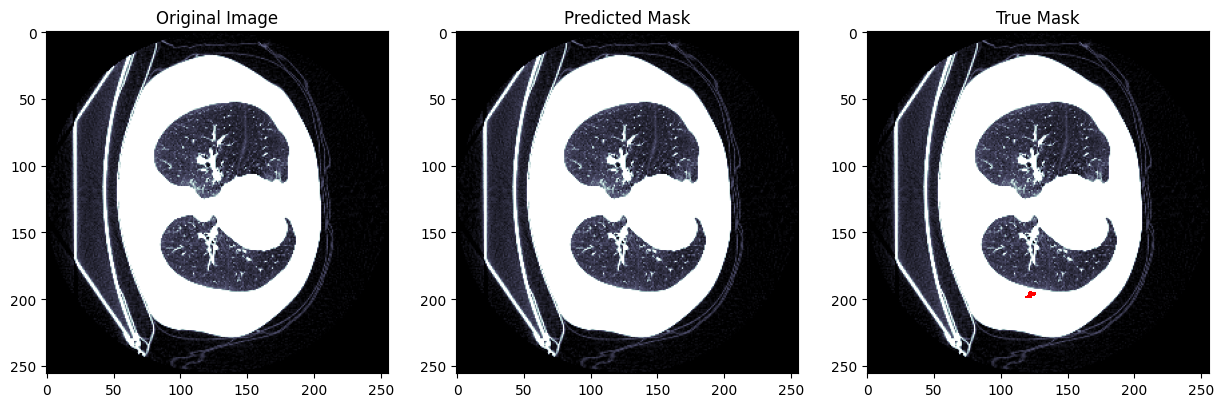

In [266]:
slice_num=140
visualize_train_segmentation(scan[slice_num],labels[slice_num],segmentation[slice_num])

# Now with a TEST subject:

In [337]:
subject = Path("lung_capstone/Task06_Lung/imagesTs/lung_085.nii.gz")
subject_ct = nib.load(subject).get_fdata()

In [338]:
subject_ct = subject_ct[:,:,:-30] #cropping 30 pixels from the bottom
#lung window
lung_window_subject_ct= np.clip(subject_ct,-1000,-500)
# standardize
standardized_scan = (lung_window_subject_ct + 1000) / 500
# Define the zooms: (from 512 to 256 px)
zoom_factors = [0.5, 0.5,1]
#extracting slices and scaling them:
standardized_scan = zoom(standardized_scan, zoom_factors, order=0)

In [339]:
standardized_scan.shape

(256, 256, 222)

In [340]:
THRESHOLD = 0.5
assert len(standardized_scan.shape) == 3, "Expected standardized_scan to be a 3D array (H, W, D)"

segmentation = []
scan = []

for i in range(standardized_scan.shape[-1]):
    slice = torch.tensor(standardized_scan[:,:,i])
    # Check for NaNs or Infs in the slice
    if np.isnan(slice).any() or np.isinf(slice).any():
        raise ValueError(f"Slice {i} contains NaN or Inf values.")
    scan.append(slice)
    slice_tensor = slice.unsqueeze(0).unsqueeze(0).float()  # Shape: [1, 1, H, W]
    slice_tensor = slice_tensor.to(device)  # Shape: [1, 1, H, W]
    with torch.no_grad():
        try:
            pred = model(slice_tensor)[0][0].cpu()
            pred = pred > THRESHOLD
            segmentation.append(pred)
            if(pred.sum()>0):
                print(i)
        except RuntimeError as e:
            print(f"RuntimeError for slice {i}: {e}")
            raise

114
116
123
137
139
163
186
187
188
189
190
191
192
206
207
208
209
210
211
212


In [318]:
import matplotlib.pyplot as plt
def visualize_segmentation(image, pred_mask):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].imshow(image, cmap='bone')
    axes[0].set_title('Original Image')
    
    axes[1].imshow(image, cmap='bone')
    mask_ = np.ma.masked_where(pred_mask==0, pred_mask)
    axes[1].imshow(mask_, cmap="autumn")
    axes[1].set_title('Predicted Mask')
    plt.show()

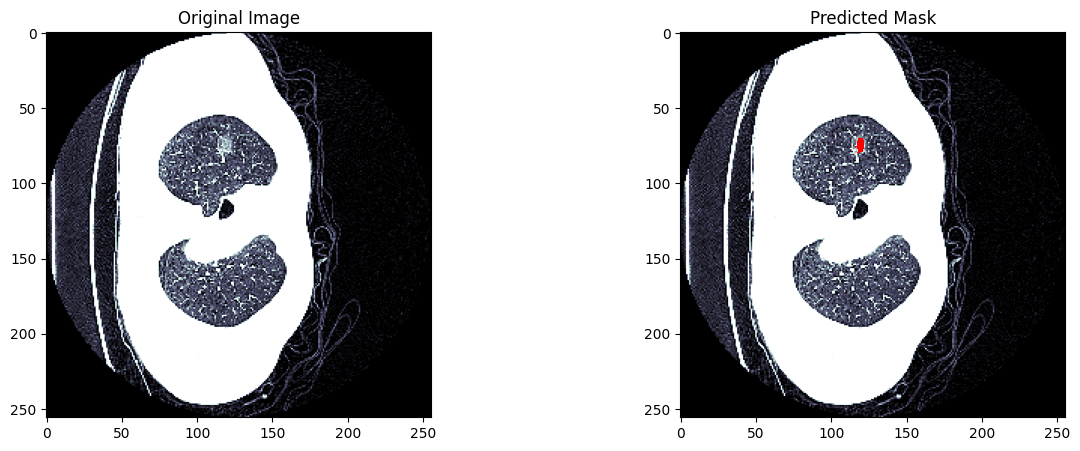

In [344]:
slice_num=187
visualize_segmentation(scan[slice_num],segmentation[slice_num])

video loading:

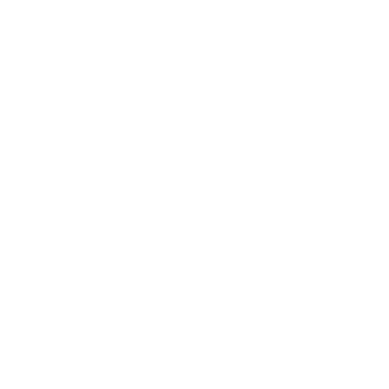

In [84]:
fig = plt.figure()
camera = Camera(fig)  # create the camera object from celluloid

for i in range(0, len(scan), 2):  # Sagital view. Skip every second slice to reduce the video length
    plt.imshow(scan[i], cmap="bone")
    mask = np.ma.masked_where(segmentation[i]==0, segmentation[i])
    plt.imshow(mask, alpha=0.5, cmap="autumn")  # Use autumn colormap to get red segmentation 
    
    plt.axis("off")
    camera.snap()  # Store the current slice
animation = camera.animate()  # create the animation

In [91]:
from IPython.display import HTML
HTML(animation.to_html5_video())  # convert the animation to a video


RuntimeError: Requested MovieWriter (ffmpeg) not available